# Clasificación de hongos venenosos

El dataset a trabajar contiene información sobre hongos provenientes de 23 especies de la familia Agaricus y Lepiota, los cuales han sido clasificados como comestibles, venenosos o de comestibilidad indeterminada.

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Lectura de los dataset de entrenamiento y de prueba

In [2]:
df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')
df_train.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,y,n,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,s,u
1,e,f,y,g,t,n,f,c,b,p,...,s,g,g,p,w,o,p,k,y,d
2,e,x,y,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m
3,e,x,s,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
4,e,x,f,n,t,n,f,c,b,p,...,s,p,w,p,w,o,p,n,v,d


In [3]:
df_train.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [4]:
df_train['type'].unique()

array(['p', 'e'], dtype=object)

In [5]:
df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)

Con los valores únicos se observa que no tenemos valores distinto a p y e, por lo tanto no hay valores nulos y no es necesario tratar con esto.

## Codificar variables

### Variable objetivo codificada
Se le asigna el valor de 1 a venenoso "p" y el valor de 0 a no venenoso "e".

In [6]:
df_train['type_encoded'] = df_train['type'].map({'p': 1, 'e': 0})
df_test['type_encoded'] = df_test['type'].map({'p': 1, 'e': 0})

### Características codificadas

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over the columns in df_train and df_test
for col in df_train.columns:
    if col != 'type':
        # Encode the column using LabelEncoder
        df_train[col] = label_encoder.fit_transform(df_train[col])
        df_test[col] = label_encoder.transform(df_test[col])

Agrego las variables codificadas en un dataframe

In [8]:
df_encoded = df_train.copy()

In [9]:
df_encoded.drop('type', axis=1, inplace=True)

In [10]:
df_encoded.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,type_encoded
0,5,3,4,1,6,1,0,1,7,0,...,7,7,0,2,1,4,2,3,5,1
1,2,3,3,1,5,1,0,0,7,1,...,3,3,0,2,1,4,2,5,0,0
2,5,3,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,3,0
3,5,2,8,0,5,1,1,0,4,1,...,7,7,0,2,1,0,2,0,1,0
4,5,0,4,1,5,1,0,0,7,1,...,6,7,0,2,1,4,3,4,0,0


## Correlación entre las variables categóricas asociadas al tronco
## Matriz de Cramer V

In [11]:
def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

rows= []

for var1 in df_encoded:
  col = []
  for var2 in df_encoded :
    cramers =cramers_V(df_encoded[var1], df_encoded[var2])
    col.append(round(cramers,2))
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = df_encoded.columns, index =df_encoded.columns)


df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divide
  return (stat/(obs*mini))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2604\3446239502.py:6: RuntimeWarning: invalid value encountered in divid

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,type_encoded
cap_shape,1.00,0.05,0.03,0.07,0.06,0.02,0.01,0.13,0.06,0.09,...,0.06,0.04,NaN,0.07,0.04,0.04,0.07,0.06,0.07,0.06
cap_surface,0.05,1.00,0.05,0.02,0.06,0.04,0.11,0.08,0.07,0.01,...,0.06,0.07,NaN,0.02,0.01,0.05,0.06,0.07,0.06,0.04
cap_color,0.03,0.05,1.00,0.05,0.11,0.06,0.17,0.22,0.08,0.37,...,0.08,0.08,NaN,0.02,0.12,0.30,0.09,0.10,0.11,0.05
bruises,0.07,0.02,0.05,1.00,0.44,0.02,0.09,0.14,0.43,0.01,...,0.24,0.25,NaN,0.02,0.00,0.60,0.39,0.09,0.29,0.26
odor,0.06,0.06,0.11,0.44,1.00,0.07,0.19,0.58,0.15,0.33,...,0.20,0.20,NaN,0.01,0.55,0.49,0.16,0.14,0.14,0.95
gill_attachment,0.02,0.04,0.06,0.02,0.07,0.99,0.00,0.01,0.63,0.03,...,0.96,0.96,NaN,0.91,0.05,0.07,0.69,0.17,0.19,0.02
gill_spacing,0.01,0.11,0.17,0.09,0.19,0.00,1.00,0.01,0.11,0.01,...,0.16,0.14,NaN,0.01,0.06,0.09,0.10,0.45,0.30,0.12
gill_size,0.13,0.08,0.22,0.14,0.58,0.01,0.01,1.00,0.62,0.05,...,0.13,0.12,NaN,0.01,0.04,0.33,0.45,0.27,0.25,0.29
gill_color,0.06,0.07,0.08,0.43,0.15,0.63,0.11,0.62,1.00,0.38,...,0.18,0.18,NaN,0.21,0.20,0.27,0.24,0.18,0.21,0.47
stalk_shape,0.09,0.01,0.37,0.01,0.33,0.03,0.01,0.05,0.38,1.00,...,0.29,0.30,NaN,0.03,0.11,0.39,0.22,0.21,0.18,0.01


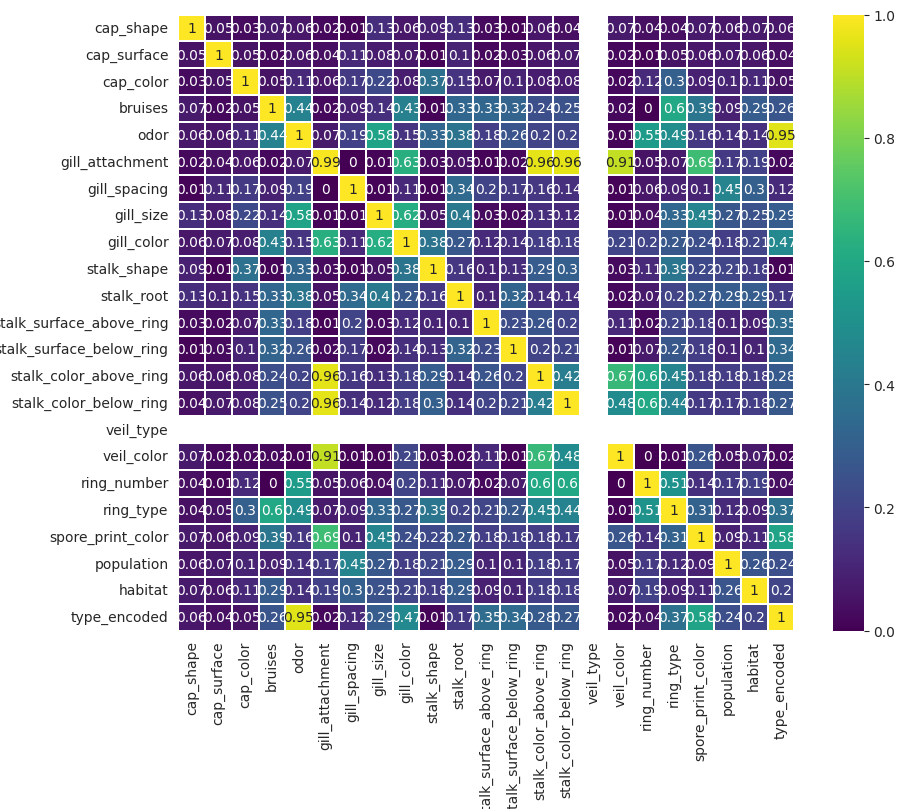

In [12]:
with sns.axes_style("white"):
  plt.figure(figsize=(10, 8))  # Agrega el tamaño de la figura más grande
  ax = sns.heatmap(df,
           vmin=0.,
           vmax=1,
           cmap='viridis',
           annot=True,
           linewidths=0.1,
           square=True)

plt.show()


Con lo anterior vemos que las variables que mejor se relacionan con type_encoded son odor, gill_color, stalk_surface_below_ring, stalk_surface_above_ring, ring_type y spore_print_color.

## Definir variable objetivo y características

Aquí nuestra variable objetivo será type, esta nos dirá si un hongo es venenoso o no y las características serán las que tienen mayor correlación con la variable type

In [13]:
features_train = df_encoded[['odor', 'gill_color', 'spore_print_color', 'ring_type', 'stalk_surface_above_ring', 'stalk_surface_below_ring']]
features_test = df_test[['odor', 'gill_color', 'spore_print_color', 'ring_type', 'stalk_surface_above_ring', 'stalk_surface_below_ring']]

X_train = features_train
y_train = df_encoded['type_encoded']

X_test = features_test
y_test = df_test['type_encoded']


## Entrenar modelo regresión logística

In [14]:
# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.999015263417036
[[1041    0]
 [   2  988]]


In [15]:
import pickle

# Guardar el modelo en un archivo .pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)